In [1]:
import pandas as pd
import os
import os.path as osp
import matplotlib.pyplot as plt
from glob import glob
from const import ID2LABELS
import numpy as np
from scipy.stats import zscore


In [2]:
path_to_root = osp.join("D:\\Project-mpg microgesture\\imigue")
path_to_data = osp.join(path_to_root,"imigue_data_phase1" ,"datasets")
path_to_valid = osp.join(path_to_data, "imigue_skeleton_validate")
path_to_train = osp.join(path_to_data, "imigue_skeleton_train")

In [3]:
def extract_all_labels_files(path_to_folder):
    all_csv_files = glob(osp.join(path_to_folder,'**',"**_label.csv"))
    df_list = []
    column_names = ["label","start_frame","end_frame"]
    for csv_file in all_csv_files:
        temp_df = pd.read_csv(csv_file, header=None, names=column_names)
        
        temp_df['filename'] = csv_file.split('/')[-1]
        df_list.append(temp_df)
    return pd.concat(df_list)
df = extract_all_labels_files(path_to_valid)
df['label_text'] = df['label'].apply(lambda x: ID2LABELS[x])
    
    

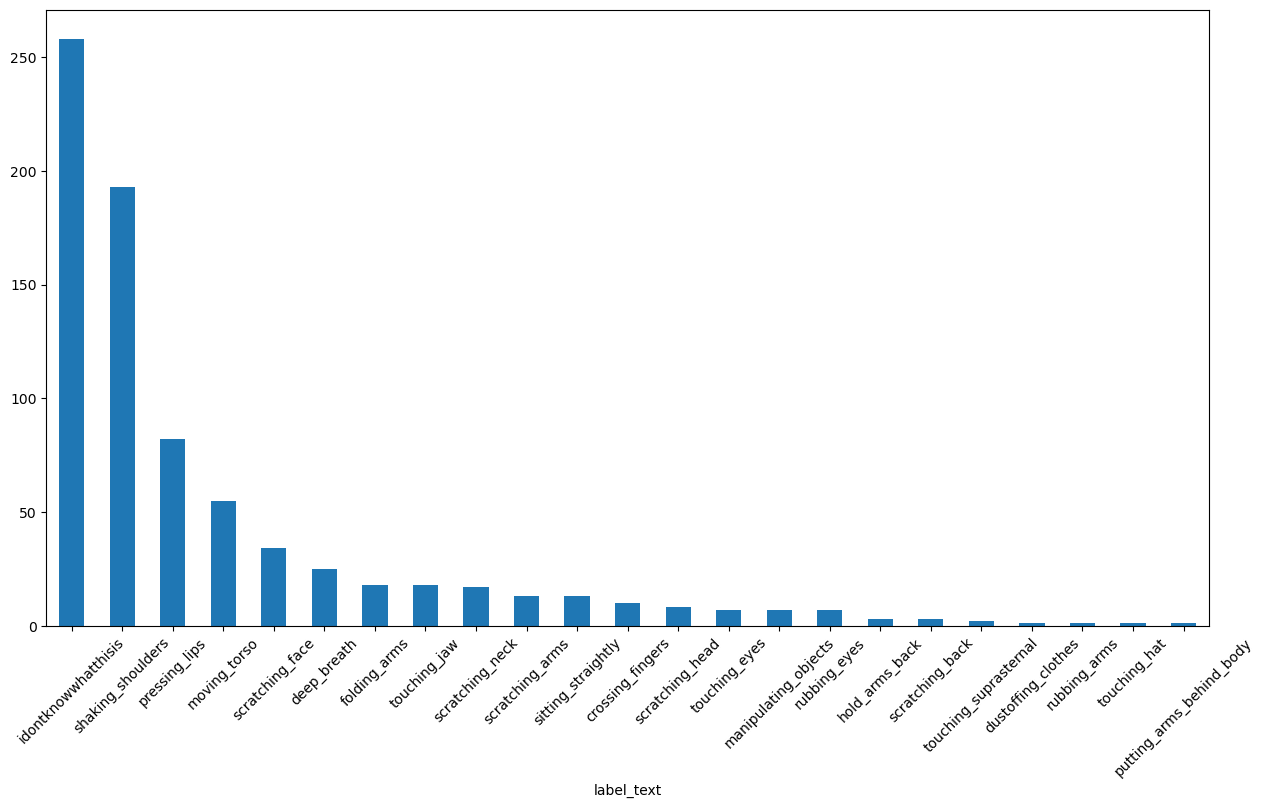

In [15]:
fig, ax = plt.subplots(
    figsize=(15,8)
)
# h = plt.hist(df['label_text'], width=2)
label_counts = df['label_text'].value_counts()
label_counts.plot(kind='bar')
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

In [16]:
df['label_text'].value_counts()

label_text
idontknowwhatthisis         258
shaking_shoulders           193
pressing_lips                82
moving_torso                 55
scratching_face              34
deep_breath                  25
folding_arms                 18
touching_jaw                 18
scratching_neck              17
scratching_arms              13
sitting_straightly           13
crossing_fingers             10
scratching_head               8
touching_eyes                 7
manipulating_objects          7
rubbing_eyes                  7
hold_arms_back                3
scratching_back               3
touching_suprasternal         2
dustoffing_clothes            1
rubbing_arms                  1
touching_hat                  1
putting_arms_behind_body      1
Name: count, dtype: int64

In [18]:
df['n_frames'] = df['end_frame'] - df['start_frame']

In [21]:
df['n_frames']

0     10
1     14
2     24
3     41
4     20
      ..
43    22
44    11
45    15
46    13
47    16
Name: n_frames, Length: 777, dtype: int64

In [39]:
# Group by label and compute statistics
# Define functions for calculating z-score and percentiles

def calc_percentile(x, percentile):
    return np.percentile(x, percentile)

label_stats = df.groupby('label_text')['n_frames'].agg(['count','max','min','mean', 'median', 'std',
                                                        lambda x: np.percentile(x, 90), 
                                                        lambda x: np.percentile(x, 10)])

# Rename the lambda functions for better readability
label_stats.columns = ['count','max','min','mean', 'median', 'std', '90th percentile', '10th percentile']

# Display the statistics
# print(label_stats)

In [40]:
label_stats

,count,max,min,mean,median,std,90th percentile,10th percentile
label_text,,,,,,,,
crossing_fingers,10,28,10,17.400000,17.0,5.680376,23.5,10.9
deep_breath,25,58,11,22.040000,21.0,9.736016,29.6,12.4
dustoffing_clothes,1,49,49,49.000000,49.0,NaN,49.0,49.0
folding_arms,18,64,10,24.833333,21.0,12.272638,36.5,15.4
hold_arms_back,3,31,14,19.666667,14.0,9.814955,27.6,14.0
idontknowwhatthisis,258,342,7,36.480620,26.5,32.848692,63.3,15.0
manipulating_objects,7,247,27,143.857143,198.0,91.539479,224.2,34.2
moving_torso,55,255,17,59.527273,52.0,38.247176,92.0,25.6
pressing_lips,82,109,7,32.487805,25.0,21.635729,65.9,14.1


In [7]:
import pickle
path_to_pickle = 'C:\\Users\\gutzc\\GitHub\\human_micro_gesture_classifier\\stgcn_imigue_startkit\\data\\iMiGUE\\imigue_processed\\valid_label.pkl'

In [10]:
with open(path_to_pickle, 'rb') as f:
    p= pickle.load(f)

In [19]:
df_label = pd.DataFrame(np.array(p).transpose(), columns=['fname','label'])
df_label['label_text'] = df_label['label'].apply(lambda x: ID2LABELS[int(x)])
df_label

,fname,label,label_text
0,0004_0,31,shaking_shoulders
1,0004_1,19,putting_arms_behind_body
2,0004_2,30,arms_akimdo
3,0004_3,31,shaking_shoulders
4,0004_4,19,putting_arms_behind_body
...,...,...,...
772,0001_66,7,rubbing_eyes
773,0001_67,30,arms_akimdo
774,0001_68,31,shaking_shoulders
775,0001_69,31,shaking_shoulders


In [22]:
path_to_np = 'C:\\Users\\gutzc\\GitHub\\human_micro_gesture_classifier\\stgcn_imigue_startkit\\data\\iMiGUE\\imigue_processed\\valid_data.npy'
loaded_array = np.load(path_to_np)
loaded_array.shape

(777, 3, 90, 22, 1)